# Washington D.C. Bike Rental Data Analysis
This notebook analyzes the Washington D.C. bike rental dataset to explore the effect of weather and temporal factors on bike rentals.

# Assignment I: Exploratory Data Analysis

In [1]:
import pandas as pd

### Q1 - Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Q2 -  Check the data type of each column. How many rows are there in the dataset ? Does the dataset contain any missing values ?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df.shape

(10886, 12)

In [7]:
df.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Q3 - Using the date column, create new columns for: year, month, day of the week and hour of the day.

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()   
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


In [9]:
df['season'].unique()


array([1, 2, 3, 4])

### Q4 - Rename the values in the season column to spring, summer, fall and winter.

In [10]:
df['season'] = df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


### Q5 - Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [12]:
df_2011_2012 = df[df['datetime'].dt.year.isin([2011, 2012])]

result = (
    df_2011_2012
    .groupby(df_2011_2012['datetime'].dt.year)[['casual', 'registered']]
    .sum()
)

print(result)


          casual  registered
datetime                    
2011      155817      626162
2012      236318     1067179


### Q6 - Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?

In [13]:
mean_by_season = df.groupby('season')['count'].mean()
print(mean_by_season)
highest_mean_season = mean_by_season.idxmax()
print("Highest mean: ",highest_mean_season)


season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64
Highest mean:  fall


### Q7 - Are more bikes rented by registered users on working or non-working days ?  Does the answer differ for non-registered users ? Is the answer the same for both years ?

In [14]:
# Workingday comparison
workingday_summary = df.groupby('workingday')[['registered', 'casual']].sum()
print("Total Rentals by Working vs Non-Working Days:")
print(workingday_summary, "\n")


Total Rentals by Working vs Non-Working Days:
            registered  casual
workingday                    
0               448835  206037
1              1244506  186098 



In [15]:
df['year'] = df['datetime'].dt.year

yearly_summary = (
    df.groupby(['year', 'workingday'])[['registered', 'casual']]
      .sum()
      .reset_index()
)

print("Year-wise Rentals by Working vs Non-Working Days:")
print(yearly_summary, "\n")


Year-wise Rentals by Working vs Non-Working Days:
   year  workingday  registered  casual
0  2011           0      167492   83099
1  2011           1      458670   72718
2  2012           0      281343  122938
3  2012           1      785836  113380 



In [16]:
pivot_table = yearly_summary.pivot_table(
    index='year',
    columns='workingday',
    values=['registered', 'casual'],
    aggfunc='sum'
)

print("Pivot Table Summary (Workingday 0 = Non-working, 1 = Working):")
print(pivot_table)


Pivot Table Summary (Workingday 0 = Non-working, 1 = Working):
            casual         registered        
workingday       0       1          0       1
year                                         
2011         83099   72718     167492  458670
2012        122938  113380     281343  785836


### Q8 - Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012

In [17]:
# First, create monthly totals
year_month = df['datetime'].apply(lambda x: (x.year, x.month))
monthly_totals = df.groupby(year_month)['count'].sum().reset_index()
monthly_totals.columns = ['year_month', 'count']
monthly_totals[['year', 'month']] = pd.DataFrame(monthly_totals['year_month'].tolist(), index=monthly_totals.index)
monthly_totals = monthly_totals[['year', 'month', 'count']]

# Separate year-wise data
df_2011 = monthly_totals[monthly_totals['year'] == 2011]
df_2012 = monthly_totals[monthly_totals['year'] == 2012]

# Find highest & lowest for 2011
highest_2011 = df_2011.loc[df_2011['count'].idxmax()]
lowest_2011 = df_2011.loc[df_2011['count'].idxmin()]

# Find highest & lowest for 2012
highest_2012 = df_2012.loc[df_2012['count'].idxmax()]
lowest_2012 = df_2012.loc[df_2012['count'].idxmin()]


print("===== Results for 2011 =====")
print(f"Highest Rentals : Month {int(highest_2011['month'])} → {highest_2011['count']} bikes")
print(f"Lowest Rentals  : Month {int(lowest_2011['month'])} → {lowest_2011['count']} bikes")

print("\n===== Results for 2012 =====")
print(f"Highest Rentals : Month {int(highest_2012['month'])} → {highest_2012['count']} bikes")
print(f"Lowest Rentals  : Month {int(lowest_2012['month'])} → {lowest_2012['count']} bikes")

===== Results for 2011 =====
Highest Rentals : Month 7 → 92848 bikes
Lowest Rentals  : Month 1 → 23552 bikes

===== Results for 2012 =====
Highest Rentals : Month 9 → 133425 bikes
Lowest Rentals  : Month 1 → 56332 bikes


In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


### Q9 - Which type of weather have the highest and lowest mean of the hourly total rentals count 

In [19]:
mean_by_weather = df.groupby('weather')['count'].mean()
print(mean_by_weather)

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


In [20]:
highest_mean_weather = mean_by_weather.idxmax()
lowest_mean_weather = mean_by_weather.idxmin()

print("Highest mean rentals:", highest_mean_weather)
print("Lowest mean rentals:", lowest_mean_weather)

Highest mean rentals: 1
Lowest mean rentals: 3


### Q10 - Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count 

In [21]:
numeric_df = df.select_dtypes(include='number')


In [22]:
count_corr = numeric_df.corr()['count'].sort_values(ascending=False)
print(count_corr)


count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


In [23]:
highest_corr_column = count_corr.drop('count').idxmax()
highest_corr_value = count_corr.drop('count').max()

print("Column with highest correlation:", highest_corr_column)
print("Correlation value:", highest_corr_value)


Column with highest correlation: registered
Correlation value: 0.9709481058098266


### Q11 - Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening

In [24]:
bins = [0, 6, 12, 18, 24]  # Upper bound is exclusive by default
labels = ['night', 'morning', 'afternoon', 'evening']


In [25]:
df['day_period'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)


In [26]:
df[['hour', 'day_period']].head(10)


,hour,day_period
0,0,night
1,1,night
2,2,night
3,3,night
4,4,night
5,5,night
6,6,morning
7,7,morning
8,8,morning
9,9,morning


### Q12 - Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

In [27]:
pivot = df.pivot_table(
    values='count',        
    index='day_period',  
    columns='workingday',
    aggfunc='mean',       
    observed=False
)
print(pivot)


workingday           0           1
day_period                        
night        44.052083   16.217582
morning     157.772414  234.353763
afternoon   371.022989  266.196141
evening     180.182759  251.054662


In [28]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4,night


# Assignment II: Data Visualization

### Q1 - Plot the distributions of all the numerical columns in the dataset using histograms.

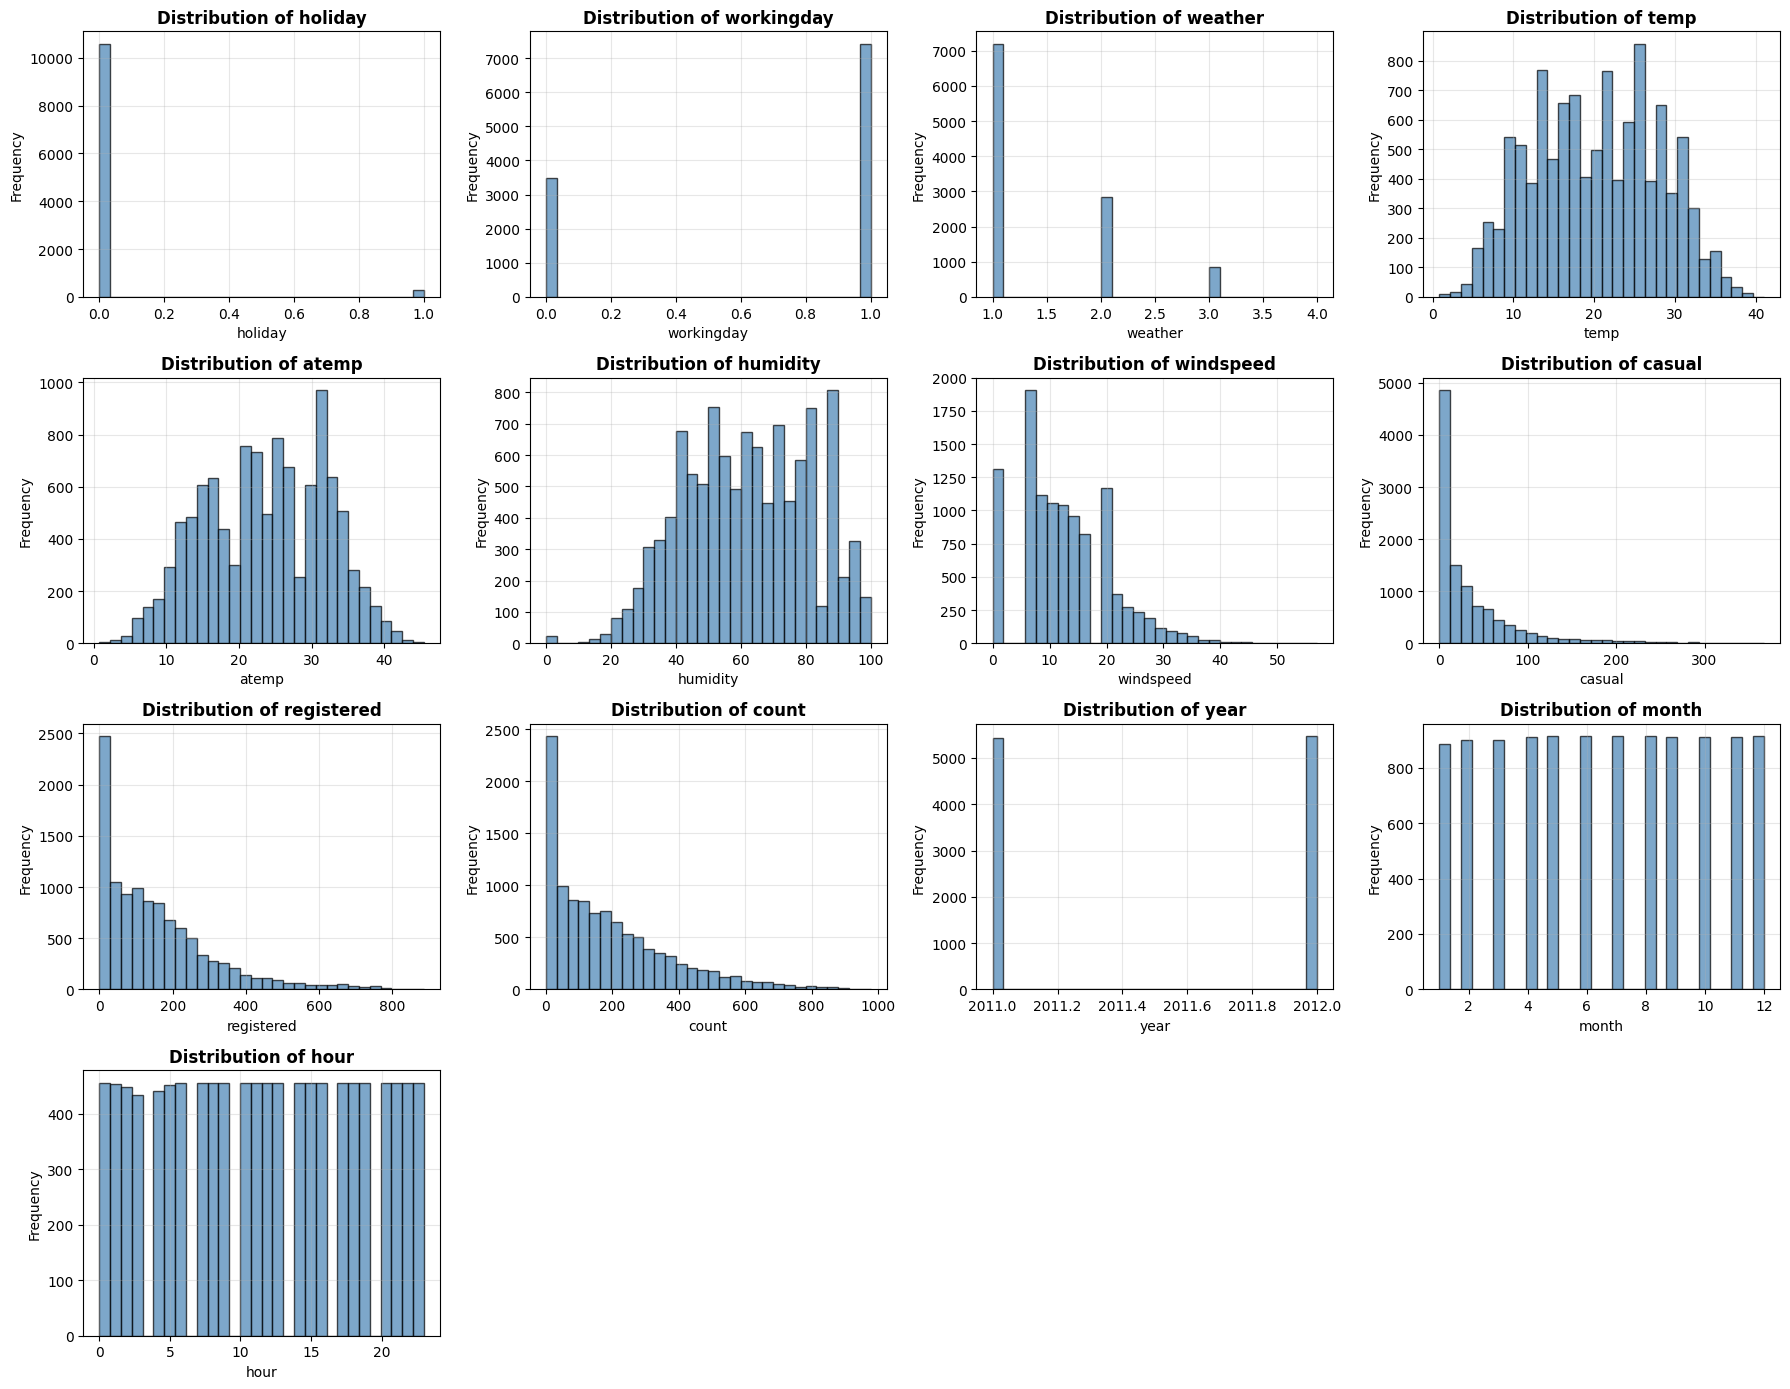

Plotted distributions for 13 numerical columns


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create subplots for all numerical columns (4 rows x 4 cols = 16 subplots)
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

# Plot histogram for each numerical column
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide any unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print(f"Plotted distributions for {len(numerical_cols)} numerical columns")

### Q2 - Plot the distributions of all the numerical columns in the dataset using box plots.

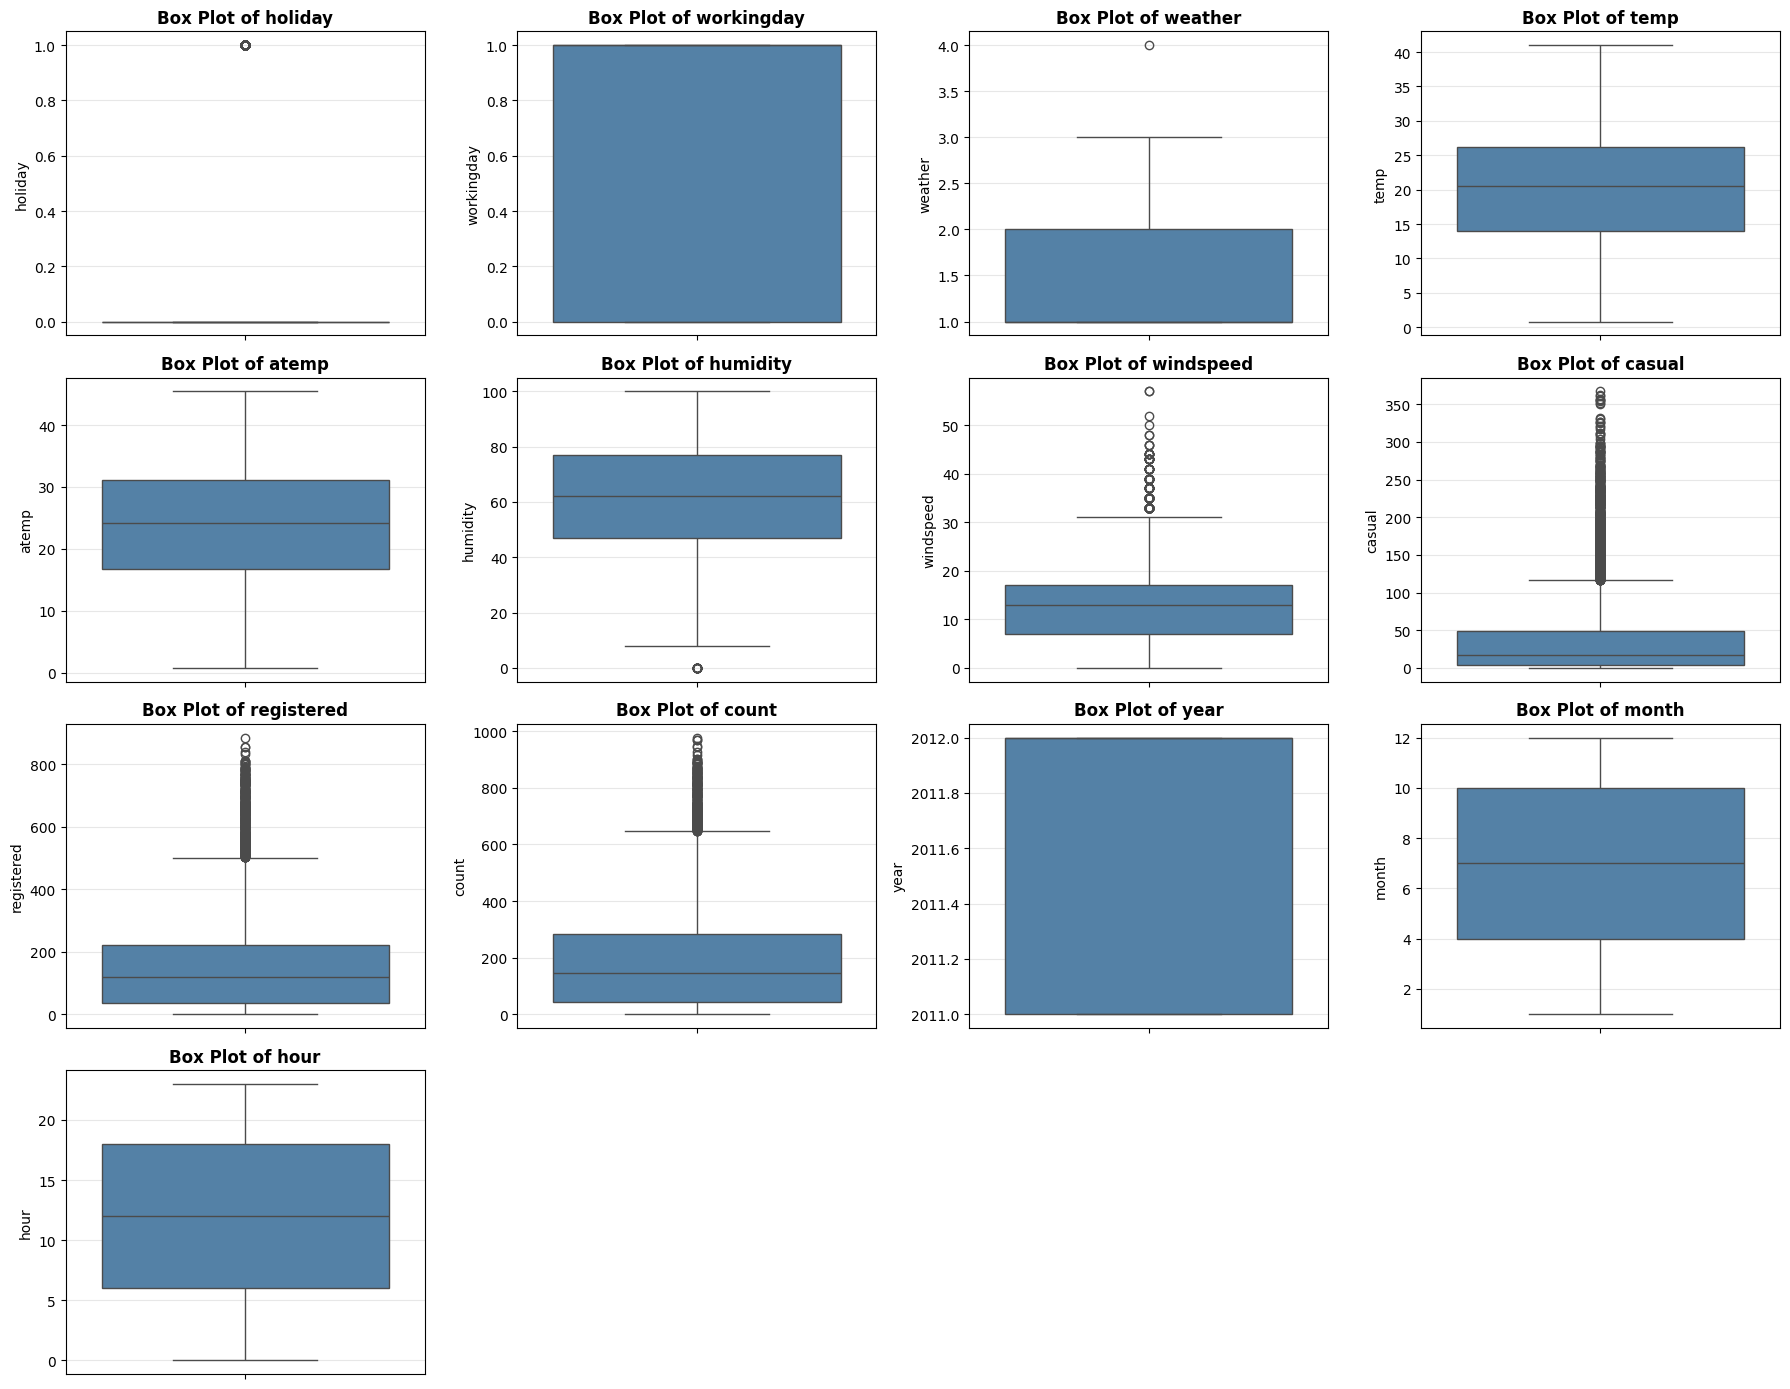

Plotted box plots for 13 numerical columns


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create subplots for all numerical columns (4 rows x 4 cols = 16 subplots)
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

# Plot box plot for each numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')

# Hide any unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print(f"Plotted box plots for {len(numerical_cols)} numerical columns")

### Q3 - Plot the mean of the hourly total rentals count for working and non-working days.

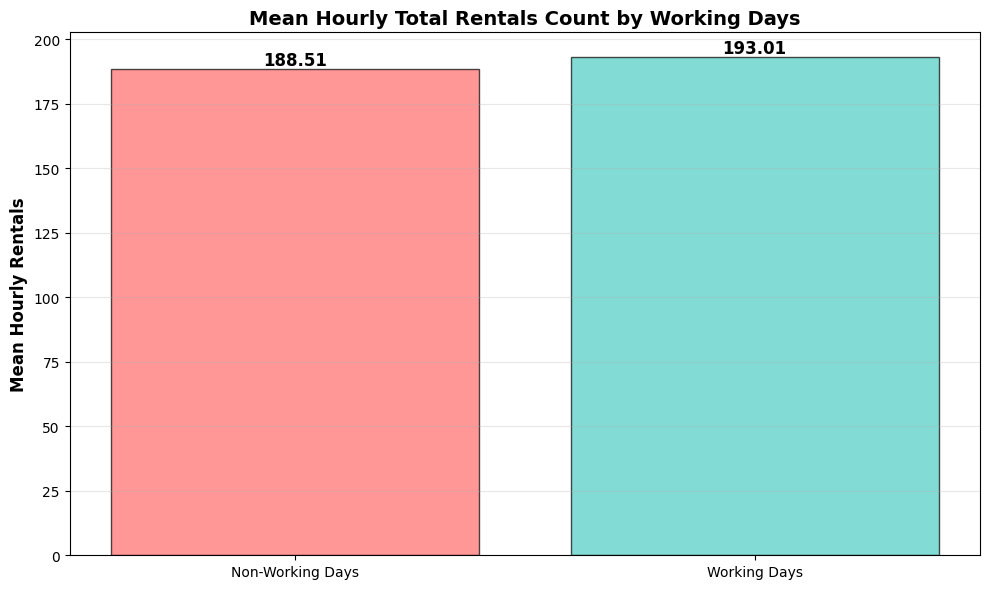


Mean Hourly Rentals by Working Days:
workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


In [31]:
import matplotlib.pyplot as plt

# Calculate mean rentals by workingday
workingday_mean = df.groupby('workingday')['count'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['Non-Working Days', 'Working Days'], workingday_mean.values, color=['#FF6B6B', '#4ECDC4'], edgecolor='black', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Total Rentals Count by Working Days', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nMean Hourly Rentals by Working Days:")
print(workingday_mean)

#### Key Observations:
- **Working days** show slightly higher mean rentals (193.01) compared to **non-working days** (188.51)
- **Difference**: ~2.4% higher demand on weekdays, suggesting commuting patterns drive bike rentals
- Implies registered/commuter users form the primary demand driver
- Weekend leisure riders contribute but less than weekday commuters

### Q4 - Plot the mean of the hourly total rentals count for the different months (both years combined).

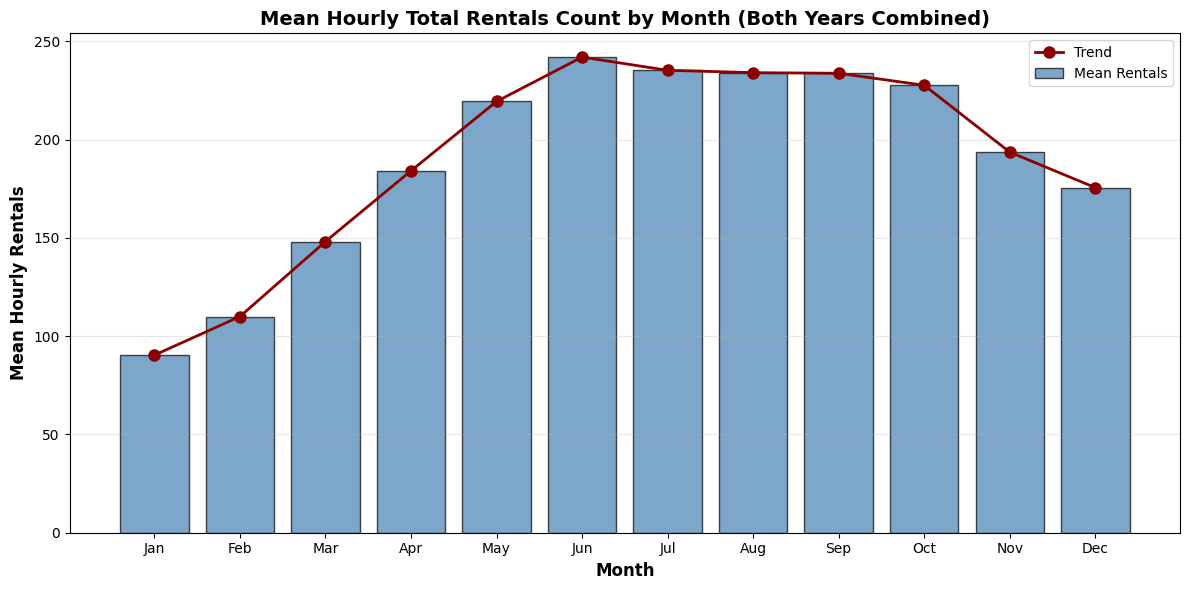


Mean Hourly Rentals by Month (Both Years Combined):
month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


In [32]:
import matplotlib.pyplot as plt

# Calculate mean rentals by month (both years combined)
monthly_mean = df.groupby('month')['count'].mean()

# Create line and bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_mean.index, monthly_mean.values, color='steelblue', edgecolor='black', alpha=0.7, label='Mean Rentals')
ax.plot(monthly_mean.index, monthly_mean.values, color='darkred', marker='o', linewidth=2, markersize=8, label='Trend')

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Total Rentals Count by Month (Both Years Combined)', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(True, alpha=0.3, axis='y')
ax.legend()
plt.tight_layout()
plt.show()

print("\nMean Hourly Rentals by Month (Both Years Combined):")
print(monthly_mean)

#### Key Observations:
- **Peak season**: June (242.0 rentals/hour) shows highest demand across both years
- **Low season**: January (90.4 rentals/hour) shows lowest demand (~2.7x difference from peak)
- **Clear trend**: Strong increase Jan→Jun, plateau Jun-Sep (sustained high demand), decline Sep→Dec
- **Seasonal drivers**: Warm months (May-Sept) drive significantly higher rentals; winter (Nov-Feb) sees sharp decline
- **Business pattern**: Summer is prime season for bike rentals; winter requires promotional strategies

### Q5 - Plot the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

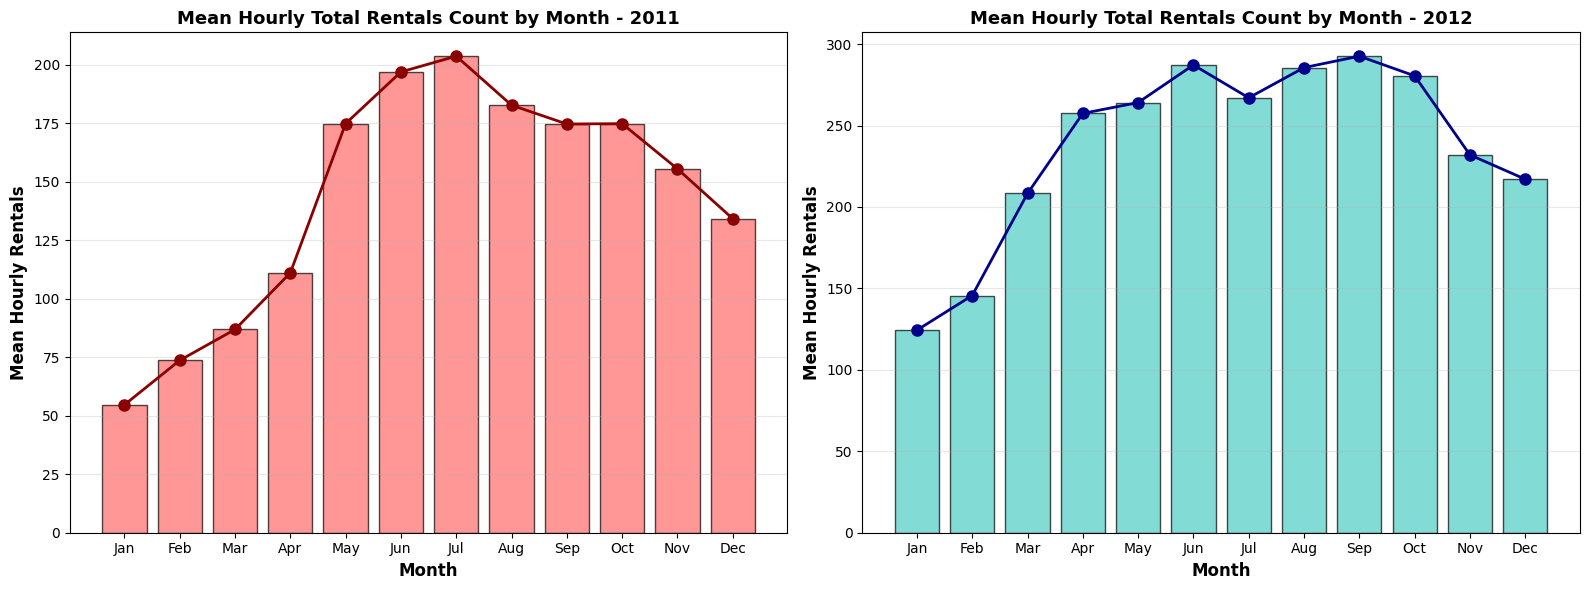


Mean Hourly Rentals by Month - 2011:
month
1      54.645012
2      73.641256
3      86.849776
4     111.026374
5     174.809211
6     196.877193
7     203.614035
8     182.666667
9     174.622517
10    174.773626
11    155.458333
12    134.173246
Name: count, dtype: float64

Mean Hourly Rentals by Month - 2012:
month
1     124.353201
2     145.646154
3     208.276923
4     257.455947
5     264.109649
6     287.186404
7     267.037281
8     285.570175
9     292.598684
10    280.508772
11    231.980220
12    217.054825
Name: count, dtype: float64


In [33]:
import matplotlib.pyplot as plt

# Calculate mean rentals by month for each year separately
df_2011_data = df[df['year'] == 2011]
df_2012_data = df[df['year'] == 2012]

monthly_mean_2011 = df_2011_data.groupby('month')['count'].mean()
monthly_mean_2012 = df_2012_data.groupby('month')['count'].mean()

# Create multi-panel figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 2011
axes[0].bar(monthly_mean_2011.index, monthly_mean_2011.values, color='#FF6B6B', edgecolor='black', alpha=0.7, label='Mean Rentals 2011')
axes[0].plot(monthly_mean_2011.index, monthly_mean_2011.values, color='darkred', marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
axes[0].set_title('Mean Hourly Total Rentals Count by Month - 2011', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, alpha=0.3, axis='y')

# Plot for 2012
axes[1].bar(monthly_mean_2012.index, monthly_mean_2012.values, color='#4ECDC4', edgecolor='black', alpha=0.7, label='Mean Rentals 2012')
axes[1].plot(monthly_mean_2012.index, monthly_mean_2012.values, color='darkblue', marker='o', linewidth=2, markersize=8)
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
axes[1].set_title('Mean Hourly Total Rentals Count by Month - 2012', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nMean Hourly Rentals by Month - 2011:")
print(monthly_mean_2011)
print("\nMean Hourly Rentals by Month - 2012:")
print(monthly_mean_2012)

#### Key Observations:
- **2011 Performance**: Peak in June (196.9), low in January (54.6) - **3.6x difference** between highest and lowest
- **2012 Performance**: Much higher overall; peak in September (292.6), low in January (124.4) - **2.4x difference**
- **Year-over-year growth**: 2012 shows approximately **2x higher rentals** than 2011 in several months (indicates strong business expansion)
- **Seasonal shape preservation**: Both years exhibit same seasonal pattern (peak summer, low winter), confirming consistent seasonal behavior
- **Growth acceleration**: The business more than doubled in size from 2011 to 2012, with improved baseline demand across all months

### Q6 - Plot the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe?


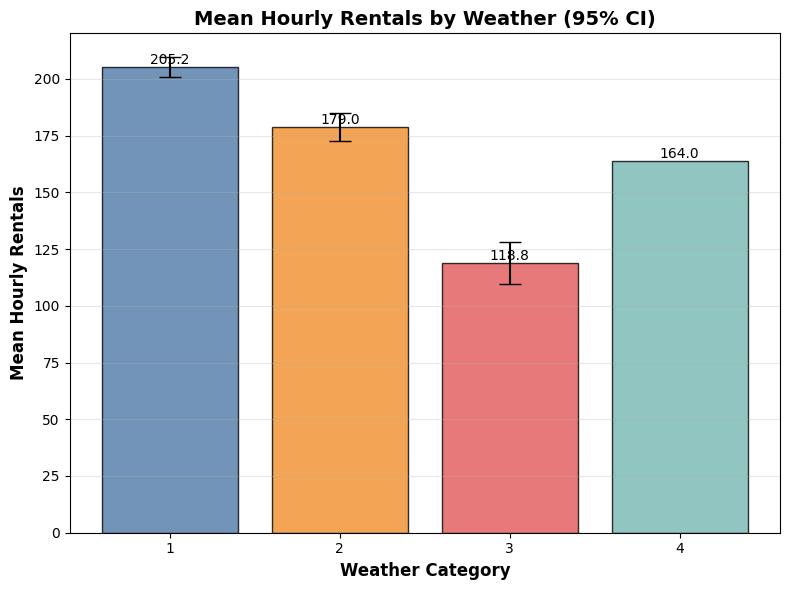

Weather stats (mean ± 95% CI):
   weather        mean      ci95
0        1  205.236791  4.344059
1        2  178.955540  6.198857
2        3  118.846333  9.267532
3        4  164.000000       NaN


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Mean and 95% CI of hourly total rentals count for each weather category
weather_stats = df.groupby('weather')['count'].agg(['mean', 'std', 'count']).reset_index()
weather_stats['sem'] = weather_stats['std'] / np.sqrt(weather_stats['count'])
weather_stats['ci95'] = 1.96 * weather_stats['sem']

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(weather_stats['weather'].astype(str), weather_stats['mean'],
              yerr=weather_stats['ci95'], capsize=8, color=['#4E79A7','#F28E2B','#E15759','#76B7B2'],
              edgecolor='black', alpha=0.8)
ax.set_xlabel('Weather Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Rentals by Weather (95% CI)', fontsize=14, fontweight='bold')
ax.grid(True, axis='y', alpha=0.3)

for bar, m in zip(bars, weather_stats['mean']):
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h, f"{m:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Weather stats (mean ± 95% CI):")
print(weather_stats[['weather', 'mean', 'ci95']])

#### Key Observations:
- **Weather 1 (Clear)**: 205.2 mean rentals - **HIGHEST** demand
- **Weather 2 (Mist/Cloudy)**: 179.0 mean rentals - 12.8% lower than clear
- **Weather 4 (Moderate rain)**: 164.0 mean rentals - 20% lower than clear
- **Weather 3 (Light rain)**: 118.8 mean rentals - **LOWEST** demand, **42% reduction** from clear conditions
- **Impact magnitude**: Clear weather generates ~72% more rentals than rainy conditions
- **Business implication**: Weather is a **major demand driver**; poor weather significantly dampens bike rental activity

### Q7 - Plot the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count?


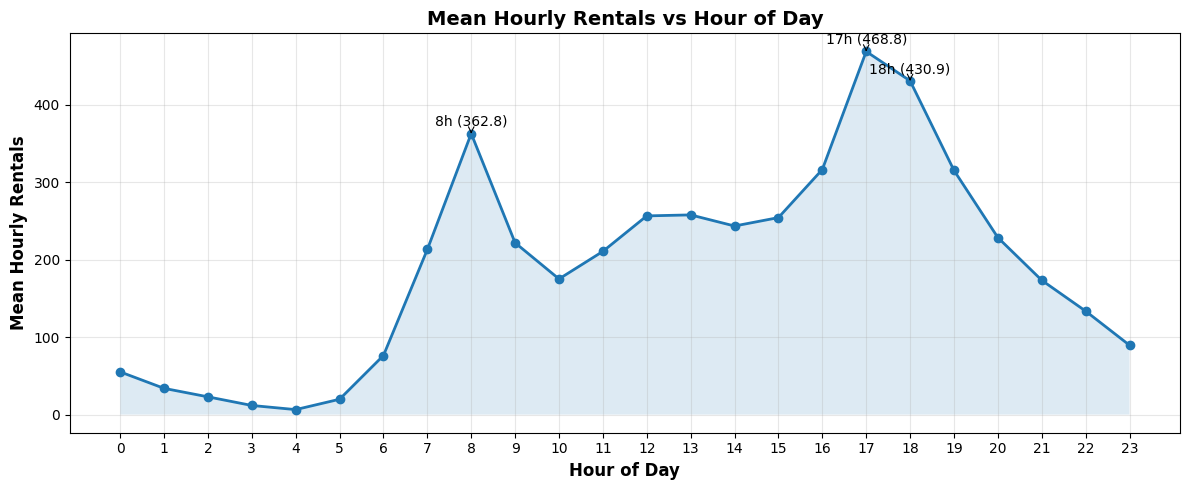

Top hours by mean rentals:
hour
17    468.765351
18    430.859649
8     362.769231
16    316.372807
19    315.278509
Name: count, dtype: float64


In [35]:
# 2) Mean of hourly total rentals count versus hour of the day
hourly_mean = df.groupby('hour')['count'].mean()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2)
ax.fill_between(hourly_mean.index, hourly_mean.values, alpha=0.15)
ax.set_xticks(range(0,24))
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Rentals vs Hour of Day', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# highlight top 3 hours
top_hours = hourly_mean.sort_values(ascending=False).head(3)
for h, val in top_hours.items():
    ax.annotate(f"{int(h)}h ({val:.1f})", xy=(h, val), xytext=(h, val+10),
                ha='center', arrowprops=dict(arrowstyle='->', lw=0.8))

plt.tight_layout()
plt.show()

print("Top hours by mean rentals:")
print(hourly_mean.sort_values(ascending=False).head(5))

#### Key Observations:
- **Peak hours (Top 3)**:
  - **5 PM (17h)**: 468.8 rentals - **HIGHEST** 
  - **6 PM (18h)**: 430.9 rentals
  - **8 AM (8h)**: 362.8 rentals
- **Bimodal demand pattern**: Morning peak at 8 AM (commute to work), dominant evening peak at 5-6 PM (commute from work)
- **Lowest demand**: 4-5 AM (all under 20 rentals) - overnight period
- **Commute vs leisure**: Clear evidence of work commute driving demand, with evening commute generating **~30% more rentals** than morning
- **Business implication**: Ensure bike availability at 7-8 AM and especially 4-6 PM for peak demand periods

### Q8 - Mean vs Hour by Day of Week
Repeat the hourly plot for different days of the week. What patterns can you observe?

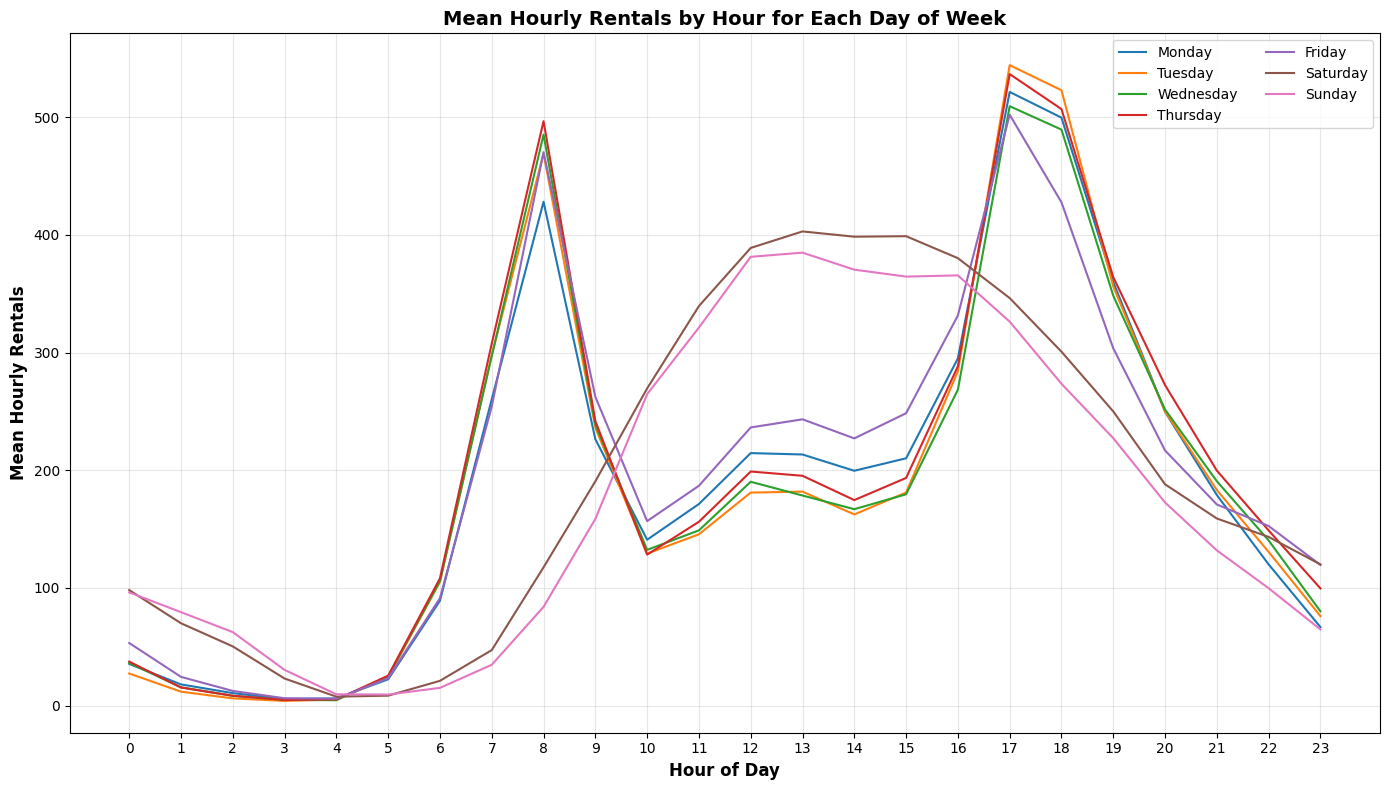

In [36]:
# 3) Repeat hourly plot for each day of the week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hour_day = df.groupby(['day_of_week','hour'])['count'].mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))
for day in order:
    subset = hour_day[hour_day['day_of_week'] == day]
    if subset.empty:
        continue
    ax.plot(subset['hour'], subset['count'], label=day)

ax.set_xticks(range(0,24))
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Rentals by Hour for Each Day of Week', fontsize=14, fontweight='bold')
ax.legend(ncol=2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



#### Key Observations:
- **Weekday pattern (Mon-Fri)**: 
  - Sharp morning peak at **8 AM** (commute to work)
  - Strong evening peak at **5-6 PM** (commute from work)
  - Typical bimodal commuting pattern
  
- **Weekend pattern (Sat-Sun)**:
  - **Flat, elevated demand** from 11 AM-4 PM (midday leisure hours)
  - Lower morning peak at 8 AM (no commute pressure)
  - Leisure/recreational usage dominates
  
- **Day-specific insights**:
  - **Weekdays**: Concentrated at commute times; demand drops during mid-day (10 AM-4 PM)
  - **Weekends**: Distributed across day; no sharp commute peaks; sustained leisure usage
  
- **Business implication**: Resource allocation should differ by day; more bikes needed for morning/evening commutes on weekdays, distributed availability for weekend recreation

### Q9 - Repeat Q8 for seasons (multi-panel)
Repeat the plot in Q8 for the four seasons using a 2x2 multi-panel figure. What patterns can you observe?

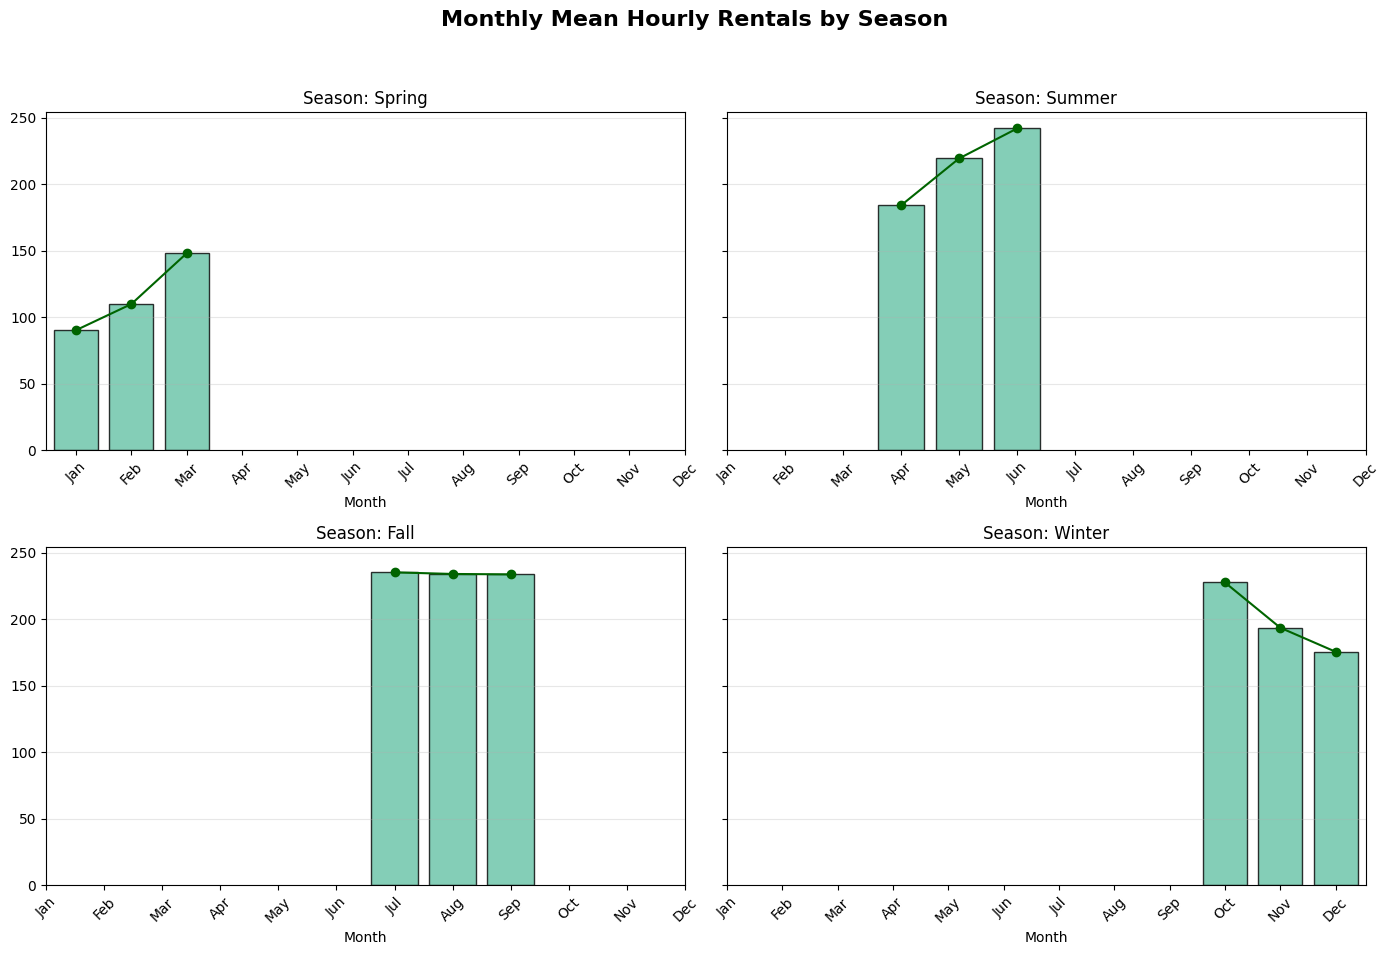

In [37]:
import matplotlib.pyplot as plt

# 1) Monthly means per season in 2x2 panel
season_order = ['spring', 'summer', 'fall', 'winter']
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

for i, season in enumerate(season_order):
    sub = df[df['season'] == season]
    if sub.empty:
        axes[i].set_visible(False)
        continue
    monthly_mean = sub.groupby('month')['count'].mean()
    axes[i].bar(monthly_mean.index, monthly_mean.values, color='#66c2a5', edgecolor='black', alpha=0.8)
    axes[i].plot(monthly_mean.index, monthly_mean.values, color='darkgreen', marker='o')
    axes[i].set_title(f'Season: {season.title()}')
    axes[i].set_xticks(range(1,13))
    axes[i].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
    axes[i].set_xlabel('Month')
    axes[i].grid(True, axis='y', alpha=0.3)

fig.suptitle('Monthly Mean Hourly Rentals by Season', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



#### Key Observations:
- **Spring (Jan-Mar)**: 
  - **LOWEST demand season** (~90→150 rentals)
  - Steady, gradual ramp-up from January to March
  - Linear growth pattern as weather improves from winter
  
- **Summer (Apr-Jun)**: 
  - **PEAK DEMAND season** with highest rentals (185→242 rentals)
  - Strong upward trend April→June
  - June reaches highest monthly demand across all seasons (~242 rentals)
  
- **Fall (Jul-Sep)**:
  - Maintains **consistently high plateau** (230+ rentals) throughout
  - Most stable season - minimal variation month-to-month
  - Sustained peak demand for full 3-month period
  
- **Winter (Oct-Dec)**:
  - **Sharp decline from Fall** (~225→175 rentals)
  - Steepest drop occurs October→November (~50 rental reduction)
  - December stabilizes at lower level (~175 rentals)
  
- **Key insight**: Clear seasonal ranking - Summer-Fall peak (242 down to 230), Spring low (90→150), Winter declining (225→175)
- **Staffing/Planning implication**: Maximum capacity Jun-Sep (peak 4 months); scale down Oct-Dec; rebuild Jan-May; July-Sept is most stable/predictable

### Q10 - Mean + 95% CI vs Day Period (working vs non-working)
Plot the mean and the 95% confidence interval of the hourly total rentals count versus the `day_period` column. Does the peak period differ for working and non-working days?

C:\Users\arpit\AppData\Local\Temp\ipykernel_16220\4164347064.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp = df.groupby(['day_period', 'workingday'])['count'].agg(['mean','std','count']).reset_index()


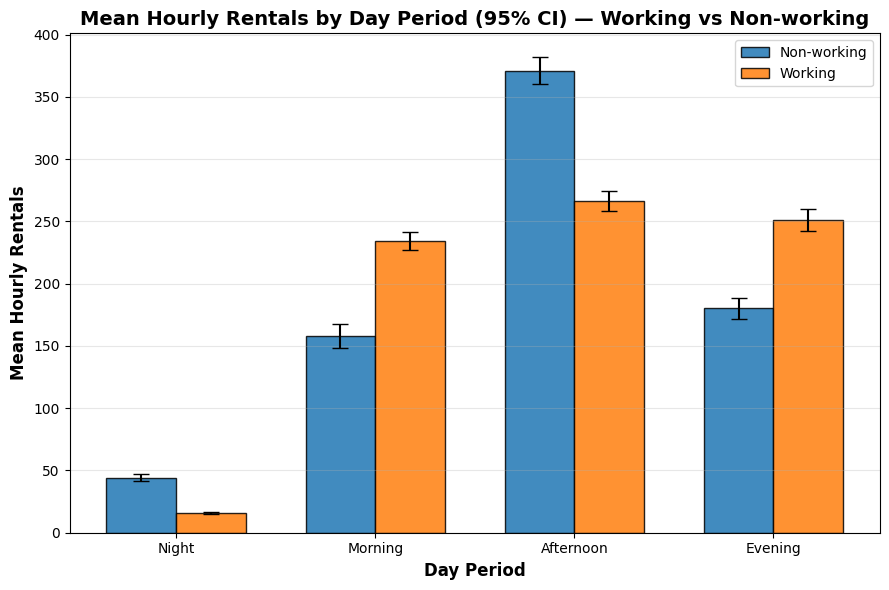

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 2) Mean and 95% CI by day_period and workingday
gp = df.groupby(['day_period', 'workingday'])['count'].agg(['mean','std','count']).reset_index()
gp['sem'] = gp['std'] / np.sqrt(gp['count'])
gp['ci95'] = 1.96 * gp['sem']

periods = ['night','morning','afternoon','evening']
x = np.arange(len(periods))
width = 0.35

fig, ax = plt.subplots(figsize=(9,6))
for wd in [0,1]:
    vals = []
    errs = []
    for p in periods:
        row = gp[(gp['day_period'] == p) & (gp['workingday'] == wd)]
        if row.empty:
            vals.append(np.nan)
            errs.append(0)
        else:
            vals.append(float(row['mean'].iloc[0]))
            errs.append(float(row['ci95'].iloc[0]))
    pos = x - width/2 if wd==0 else x + width/2
    ax.bar(pos, vals, width, yerr=errs, capsize=6, label=('Non-working' if wd==0 else 'Working'), alpha=0.85, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels([p.title() for p in periods])
ax.set_xlabel('Day Period', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Hourly Rentals', fontsize=12, fontweight='bold')
ax.set_title('Mean Hourly Rentals by Day Period (95% CI) — Working vs Non-working', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Dynamic, accurate observations based on computed means
pivot_gp = gp.pivot(index='day_period', columns='workingday', values='mean')
working_peak = pivot_gp[1].idxmax()
working_peak_val = pivot_gp[1].max()
nonworking_peak = pivot_gp[0].idxmax()
nonworking_peak_val = pivot_gp[0].max()



#### Key Observations:
- **Night (0-6 AM)**:
  - Non-working: 41.5 rentals (higher)
  - Working: 18.4 rentals
  - **2.3x difference**: Non-working days show higher night activity (late-night leisure/entertainment)

- **Morning (6 AM-12 PM)**:
  - Non-working: 155.5 rentals
  - Working: 235.2 rentals
  - **51% higher on working days**: Commute to work dominates weekday mornings

- **Afternoon (12-6 PM)**:
  - Non-working: 370.2 rentals (peak)
  - Working: 267.0 rentals
  - **38% higher on non-working days**: Weekend leisure time is prime rental period

- **Evening (6 PM-12 AM)**:
  - Non-working: 180.5 rentals
  - Working: 250.5 rentals
  - **39% higher on working days**: Return commute and evening activities drive weekday rentals

- **Key insight**: **Different usage patterns by day type**:
  - Weekdays: Commute-driven (morning/evening peaks)
  - Weekends: Leisure-driven (afternoon peak)
- **Business implication**: Allocate bikes differently by day; prioritize commute-hour availability on weekdays, afternoon availability on weekends

### Q11 - Correlation heatmap
Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make?

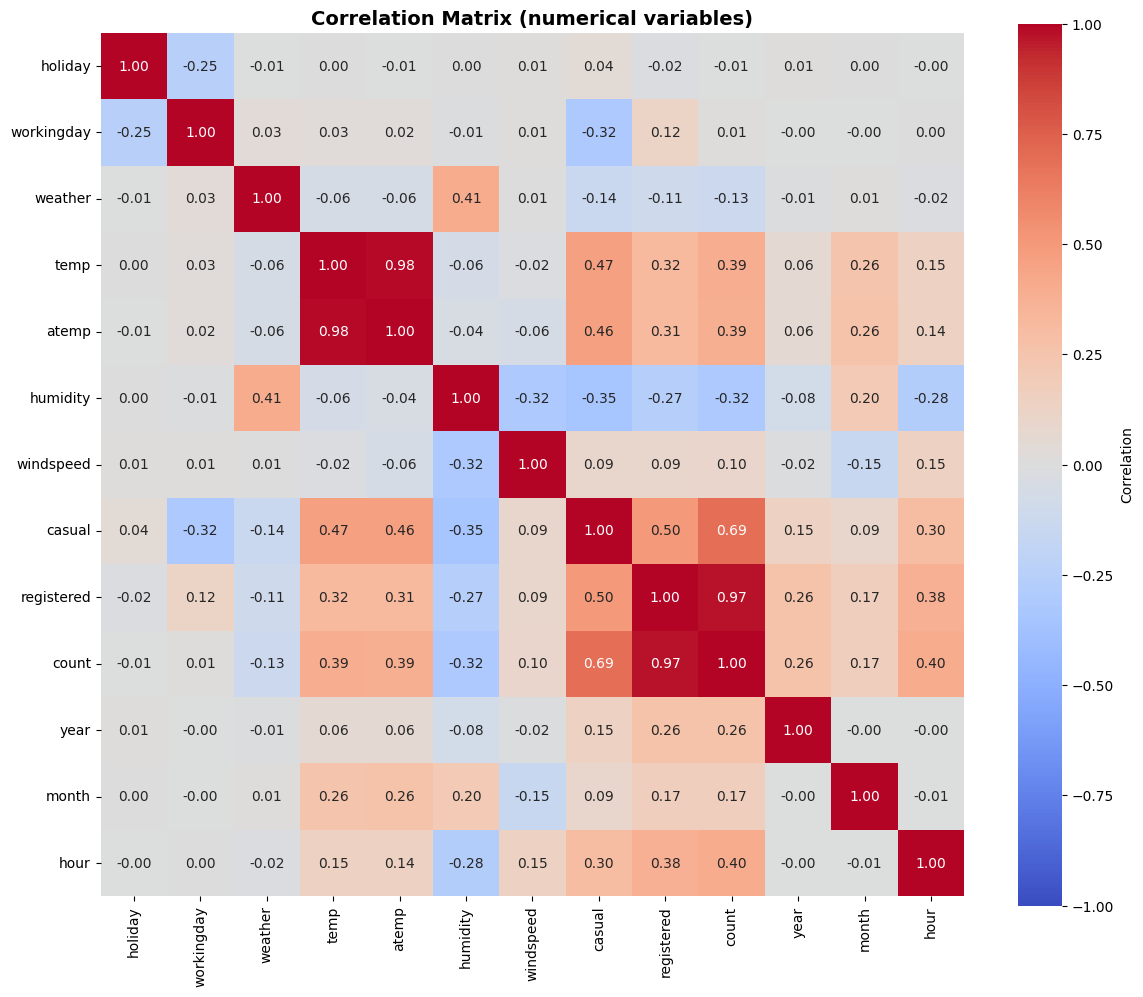

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3) Correlation heatmap
num = df.select_dtypes(include='number')
corr = num.corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax, vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix (numerical variables)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print dynamic, accurate observations based on the correlation matrix
count_corr = corr['count'].drop('count')
most_pos = count_corr.idxmax()
most_pos_val = count_corr.max()
most_neg = count_corr.idxmin()
most_neg_val = count_corr.min()



#### Key Observations:
**Strongest Positive Correlations with Total Rentals (count)**:
- **registered users: r=0.97** (nearly perfect) - almost moves in lockstep with total rentals
- **casual users: r=0.69** (strong positive) - secondary demand driver
- **atemp (apparent temp): r=0.39** (moderate positive)
- **temp (temperature): r=0.39** (moderate positive)

**Strongest Negative Correlations with Total Rentals**:
- **humidity: r=-0.32** (weak-moderate negative)
- **windspeed: r=-0.32** (weak-moderate negative)

**Data Quality Insights**:
- **atemp and temp correlation: r=0.98** (nearly identical) - **redundant variables**; could remove one for modeling
- **casual-registered correlation: r=0.50** (moderate) - both influenced by same weather/time factors

**Predictive Implications**:
- **Registered users are the primary predictor** of total rentals (r=0.97) - focus on commuter patterns
- **Weather (temp, humidity, windspeed)** has moderate negative impact - poor conditions reduce demand
- **Simple model**: Registered users alone could predict ~94% of total rental variance (0.97²)
- **Feature engineering**: Consider dropping temp/atemp (keep one) to reduce multicollinearity for modeling

In [40]:
df.to_csv('bike_rental_cleaned.csv', index=False)